In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing

In [2]:
dataset = pd.read_csv('WestRoxbury.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5802 entries, 0 to 5801
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TOTAL VALUE   5802 non-null   float64
 1   TAX           5802 non-null   int64  
 2   LOT SQFT      5802 non-null   int64  
 3   YR BUILT      5802 non-null   int64  
 4   GROSS AREA    5802 non-null   int64  
 5   LIVING AREA   5802 non-null   int64  
 6   FLOORS        5802 non-null   float64
 7   ROOMS         5802 non-null   int64  
 8   BEDROOMS      5802 non-null   int64  
 9   FULL BATH     5802 non-null   int64  
 10  HALF BATH     5802 non-null   int64  
 11  KITCHEN       5802 non-null   int64  
 12  FIREPLACE     5802 non-null   int64  
 13  REMODEL       5802 non-null   object 
dtypes: float64(2), int64(11), object(1)
memory usage: 634.7+ KB


In [4]:
print("Total rows:", len(dataset.TAX))

Total rows: 5802


In [5]:
ds = dataset
print(ds.columns)

Index(['TOTAL VALUE ', 'TAX', 'LOT SQFT ', 'YR BUILT', 'GROSS AREA ',
       'LIVING AREA', 'FLOORS ', 'ROOMS', 'BEDROOMS ', 'FULL BATH',
       'HALF BATH', 'KITCHEN', 'FIREPLACE', 'REMODEL'],
      dtype='object')


In [6]:
#1 renaming column names
ds = ds.rename(columns={'TOTAL VALUE ': 'TOTAL_VALUE', 'LOT SQFT ': 'LOT_SQFT', 'YR BUILT': 'YR_BUILT', 'GROSS AREA ': 'GROSS_AREA', 'LIVING AREA': 'LIVING_AREA', 'FLOORS ': 'FLOORS', 'BEDROOMS ': 'BEDROOMS', 'FULL BATH': 'FULL_BATH', 'HALF BATH': 'HALF_BATH'})

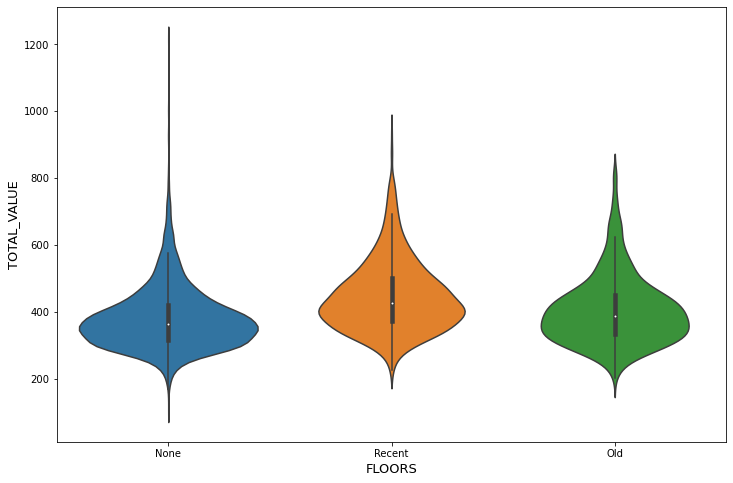

In [7]:
#2
#voilin plot to study the distribution of the data
plt.figure(figsize=(12,8))
sns.violinplot(x='REMODEL', y='TOTAL_VALUE', data=ds)
plt.xlabel('FLOORS', fontsize=13)
plt.ylabel('TOTAL_VALUE', fontsize=13)
plt.show()

In [8]:
ds

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL
0,344.2,4330,9965,1880,2436,1352,2.0,6,3,1,1,1,0,None
1,412.6,5190,6590,1945,3108,1976,2.0,10,4,2,1,1,0,Recent
2,330.1,4152,7500,1890,2294,1371,2.0,8,4,1,1,1,0,None
3,498.6,6272,13773,1957,5032,2608,1.0,9,5,1,1,1,1,None
4,331.5,4170,5000,1910,2370,1438,2.0,7,3,2,0,1,0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5797,404.8,5092,6762,1938,2594,1714,2.0,9,3,2,1,1,1,Recent
5798,407.9,5131,9408,1950,2414,1333,2.0,6,3,1,1,1,1,None
5799,406.5,5113,7198,1987,2480,1674,2.0,7,3,1,1,1,1,None
5800,308.7,3883,6890,1946,2000,1000,1.0,5,2,1,0,1,0,None


In [9]:
#3 check for missing/null values

ds['TOTAL_VALUE'].value_counts()


309.600    8
410.800    8
363.800    8
354.200    8
356.000    8
          ..
488.500    1
559.800    1
471.700    1
425.700    1
413.414    1
Name: TOTAL_VALUE, Length: 2748, dtype: int64

In [10]:
#checking for any inconsistency
ds['LOT_SQFT'].value_counts()


5000    336
6000    124
4000    101
5500    100
4500     41
       ... 
8709      1
4203      1
3485      1
3131      1
7406      1
Name: LOT_SQFT, Length: 3096, dtype: int64

In [11]:
#checking for any inconsistency
ds['GROSS_AREA'].value_counts()


2304    23
2160    22
2328    20
2520    19
2604    18
        ..
4319     1
3179     1
5180     1
4628     1
1998     1
Name: GROSS_AREA, Length: 2318, dtype: int64

In [12]:
#checking for any inconsistency
ds['FLOORS'].value_counts()


2.0    3415
1.0    1505
1.5     773
2.5     105
3.0       4
Name: FLOORS, dtype: int64

In [13]:
#checking for any inconsistency
ds['YR_BUILT'].value_counts()

1920    566
1950    478
1930    430
1960    356
1925    302
       ... 
1883      1
1976      1
0         1
1874      1
1800      1
Name: YR_BUILT, Length: 149, dtype: int64

In [14]:
#remove the year with 0 value
ds = ds[ds.YR_BUILT != 0]

In [15]:
ds['YR_BUILT'].value_counts()

1920    566
1950    478
1930    430
1960    356
1925    302
       ... 
1798      1
1883      1
1881      1
1874      1
1872      1
Name: YR_BUILT, Length: 148, dtype: int64

In [16]:
#checking for any inconsistency
ds['TAX'].value_counts()

4478    8
4455    8
5167    8
3894    8
4576    8
       ..
9475    1
6136    1
6145    1
7042    1
7095    1
Name: TAX, Length: 2734, dtype: int64

In [17]:
#checking for any inconsistency
ds['LIVING_AREA'].value_counts()

1306    80
1726    56
1075    56
1680    41
1536    39
        ..
4100     1
1381     1
1604     1
1374     1
1662     1
Name: LIVING_AREA, Length: 1712, dtype: int64

In [18]:
#checking for any inconsistency
ds['FLOORS'].value_counts()

2.0    3414
1.0    1505
1.5     773
2.5     105
3.0       4
Name: FLOORS, dtype: int64

In [19]:
#checking for any inconsistency
ds['ROOMS'].value_counts()

7     1769
6     1669
8      935
5      578
9      450
10     200
4       71
11      66
12      45
13      10
14       5
3        3
Name: ROOMS, dtype: int64

In [20]:
#checking for any inconsistency
ds['BEDROOMS'].value_counts()

3    3238
4    1349
2     818
5     258
6      90
1      30
7      14
8       3
9       1
Name: BEDROOMS, dtype: int64

In [21]:
#checking for any inconsistency
ds['HALF_BATH'].value_counts()

1    3286
0    2378
2     136
3       1
Name: HALF_BATH, dtype: int64

In [22]:
#checking for any inconsistency
ds['FULL_BATH'].value_counts()

1    4249
2    1398
3     140
4      13
5       1
Name: FULL_BATH, dtype: int64

In [23]:
#checking for any inconsistency
ds['KITCHEN'].value_counts()

1    5712
2      89
Name: KITCHEN, dtype: int64

In [24]:
#checking for any inconsistency
ds['FIREPLACE'].value_counts()

1    3657
0    1842
2     275
3      23
4       4
Name: FIREPLACE, dtype: int64

In [25]:
#checking for any inconsistency
ds['REMODEL'].value_counts()

None      4346
Recent     874
Old        581
Name: REMODEL, dtype: int64

In [26]:
#4 Identify and remove any duplicated rows in the dataset
dup = ds[ds.duplicated()]
print("duplicated rows:{}".format(dup))
ds.drop_duplicates(inplace=True)
print("After dropping, rows=", len(ds.TAX))

duplicated rows:      TOTAL_VALUE   TAX  LOT_SQFT  YR_BUILT  GROSS_AREA  LIVING_AREA  FLOORS  \
1178        564.8  7105      6000      2005        4398         2543     2.0   
3894        582.8  7331      6009      2004        3826         2341     2.0   
5227        620.4  7804      5000      2004        4149         2516     2.0   

      ROOMS  BEDROOMS  FULL_BATH  HALF_BATH  KITCHEN  FIREPLACE REMODEL  
1178      8         4          2          2        1          1    None  
3894      7         4          2          1        1          1    None  
5227      7         4          3          1        1          2    None  
After dropping, rows= 5798


C:\Users\pavan\AppData\Local\Temp\ipykernel_17764\2435006973.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds.drop_duplicates(inplace=True)


In [27]:
#5 Examine feature varience
pd.set_option('display.max_columns', None)
ds.describe()
ds.round(2)

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL
0,344.2,4330,9965,1880,2436,1352,2.0,6,3,1,1,1,0,None
1,412.6,5190,6590,1945,3108,1976,2.0,10,4,2,1,1,0,Recent
2,330.1,4152,7500,1890,2294,1371,2.0,8,4,1,1,1,0,None
3,498.6,6272,13773,1957,5032,2608,1.0,9,5,1,1,1,1,None
4,331.5,4170,5000,1910,2370,1438,2.0,7,3,2,0,1,0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5797,404.8,5092,6762,1938,2594,1714,2.0,9,3,2,1,1,1,Recent
5798,407.9,5131,9408,1950,2414,1333,2.0,6,3,1,1,1,1,None
5799,406.5,5113,7198,1987,2480,1674,2.0,7,3,1,1,1,1,None
5800,308.7,3883,6890,1946,2000,1000,1.0,5,2,1,0,1,0,None


In [28]:
#6 Drop irrelevant column - adds no value to the analysis
ds = ds.drop('GROSS_AREA', axis=1)

In [29]:
ds = ds.drop('TAX', axis=1)

In [30]:
ds

,TOTAL_VALUE,LOT_SQFT,YR_BUILT,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL
0,344.2,9965,1880,1352,2.0,6,3,1,1,1,0,None
1,412.6,6590,1945,1976,2.0,10,4,2,1,1,0,Recent
2,330.1,7500,1890,1371,2.0,8,4,1,1,1,0,None
3,498.6,13773,1957,2608,1.0,9,5,1,1,1,1,None
4,331.5,5000,1910,1438,2.0,7,3,2,0,1,0,None
...,...,...,...,...,...,...,...,...,...,...,...,...
5797,404.8,6762,1938,1714,2.0,9,3,2,1,1,1,Recent
5798,407.9,9408,1950,1333,2.0,6,3,1,1,1,1,None
5799,406.5,7198,1987,1674,2.0,7,3,1,1,1,1,None
5800,308.7,6890,1946,1000,1.0,5,2,1,0,1,0,None


In [31]:
#7 removing outliers

ds = ds[ds.ROOMS != 14]

In [32]:
ds['ROOMS'].value_counts()

7     1767
6     1669
8      934
5      578
9      450
10     200
4       71
11      66
12      45
13      10
3        3
Name: ROOMS, dtype: int64

In [33]:
#this step is reepeated below
#added here to be used for next steps
dfdum = ds

dfdum = pd.get_dummies(dfdum,columns=['REMODEL'])


In [34]:
dfdum = pd.get_dummies(dfdum, drop_first = True)

In [35]:
#8 standardization - z-form
from sklearn.preprocessing import StandardScaler

# create a scaler object
std_scaler = StandardScaler()
std_scaler
# fit and transform the data
dfT = dfdum
df_std = pd.DataFrame(std_scaler.fit_transform(dfT), columns=dfT.columns)

df_std

,TOTAL_VALUE,LOT_SQFT,YR_BUILT,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL_None,REMODEL_Old,REMODEL_Recent
0,-0.487139,1.382989,-2.244231,-0.563449,0.711798,-0.694264,-0.269798,-0.567362,0.724999,-0.124912,-1.309810,0.578347,-0.333557,-0.420951
1,0.204918,0.117823,0.312371,0.596020,0.711798,2.115285,0.917848,1.356951,0.724999,-0.124912,-1.309810,-1.729066,-0.333557,2.375573
2,-0.629800,0.458949,-1.850908,-0.528145,0.711798,0.710511,0.917848,-0.567362,0.724999,-0.124912,-1.309810,0.578347,-0.333557,-0.420951
3,1.075048,2.810471,0.784358,1.770353,-1.535311,1.412898,2.105494,-0.567362,0.724999,-0.124912,0.463438,0.578347,-0.333557,-0.420951
4,-0.615635,-0.478211,-1.064261,-0.403650,0.711798,0.008124,-0.269798,1.356951,-1.149965,-0.124912,-1.309810,0.578347,-0.333557,-0.420951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5788,0.125999,0.182299,0.037044,0.109191,0.711798,1.412898,-0.269798,1.356951,0.724999,-0.124912,0.463438,-1.729066,-0.333557,2.375573
5789,0.157364,1.174190,0.509032,-0.598753,0.711798,-0.694264,-0.269798,-0.567362,0.724999,-0.124912,0.463438,0.578347,-0.333557,-0.420951
5790,0.143199,0.345740,1.964328,0.034867,0.711798,0.008124,-0.269798,-0.567362,0.724999,-0.124912,0.463438,0.578347,-0.333557,-0.420951
5791,-0.846321,0.230282,0.351703,-1.217508,-1.535311,-1.396651,-1.457445,-0.567362,-1.149965,-0.124912,-1.309810,0.578347,-0.333557,-0.420951


In [36]:
#9 normalization - min-max scaling

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
attributes = ['TOTAL_VALUE','LOT_SQFT']
dfdum[attributes] = scaler.fit_transform(dfdum[attributes])
dfdum.sample(10)

,TOTAL_VALUE,LOT_SQFT,YR_BUILT,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL_None,REMODEL_Old,REMODEL_Recent
1289,0.176941,0.118576,1940,1084,1.0,6,3,1,0,1,1,1,0,0
4411,0.233555,0.088145,1925,1389,2.0,7,4,1,1,1,0,1,0,0
3917,0.232027,0.078808,1900,1991,2.0,6,3,2,0,1,1,1,0,0
2603,0.332495,0.196393,1920,1486,2.0,7,3,1,1,1,1,1,0,0
889,0.188893,0.082155,1956,1548,1.5,7,3,1,1,1,1,0,1,0
5324,0.218638,0.088145,1938,1319,1.5,6,2,1,0,1,1,1,0,0
3543,0.338785,0.081979,1920,2572,2.0,9,5,1,1,1,0,1,0,0
34,0.208663,0.088145,1920,1906,2.0,9,4,2,0,1,0,1,0,0
1957,0.225377,0.076827,1920,1456,2.0,6,3,1,1,1,1,1,0,0
3882,0.164091,0.071630,1954,1225,1.0,6,3,1,0,1,1,1,0,0


In [37]:
#10 handling inconsistencies

ds['TOTAL_VALUE'].dtypes

dtype('float64')

In [38]:
ds['LOT_SQFT'].dtypes

dtype('int64')

In [39]:
ds['YR_BUILT'].dtypes

dtype('int64')

In [40]:
ds['FLOORS'].dtypes

dtype('float64')

In [41]:
ds['LIVING_AREA'].dtypes

dtype('int64')

In [42]:
ds['BEDROOMS'].dtypes

dtype('int64')

In [43]:
ds['FULL_BATH'].dtypes

dtype('int64')

In [44]:
#11 binning - qcut

ds['YR_BUILT'].describe()

count    5793.000000
mean     1937.058174
std        25.426573
min      1798.000000
25%      1920.000000
50%      1935.000000
75%      1955.000000
max      2011.000000
Name: YR_BUILT, dtype: float64

In [45]:
#12 Data Transformation - split data as train and test

from sklearn.model_selection import train_test_split

df = ds
# get the locations
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
 
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.05, random_state=0)

In [46]:
X_train

,TOTAL_VALUE,LOT_SQFT,YR_BUILT,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE
898,349.4,5049,1956,1506,1.5,6,3,1,0,1,1
1190,284.3,2833,1935,1440,2.0,7,3,1,0,1,0
5314,366.8,7500,1945,1583,1.0,6,3,2,0,1,1
2533,375.0,6250,1920,1861,2.0,7,4,1,1,1,0
4473,422.2,4661,1931,1536,2.0,7,3,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4939,401.2,5250,1929,1732,2.0,7,3,1,1,1,1
3269,453.7,6303,1910,2906,2.0,9,4,1,1,1,1
1655,359.9,7796,1860,1808,2.0,8,3,2,0,1,0
2610,385.8,10925,1950,1127,1.0,5,2,2,0,1,1


In [47]:
X_test

,TOTAL_VALUE,LOT_SQFT,YR_BUILT,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE
1842,535.8,5577,1924,2988,2.0,10,4,2,1,1,2
1828,375.5,8563,1928,1846,2.0,8,4,1,0,1,0
5777,359.2,4924,1930,1376,2.0,6,3,1,0,1,1
2032,316.2,4598,1910,1478,2.0,7,3,1,0,1,1
2381,380.3,5155,1933,1411,2.0,6,3,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
3072,606.4,13830,1986,2344,2.0,7,3,2,1,1,1
2876,348.7,5643,1954,1459,1.5,6,2,1,1,1,1
195,266.3,6089,1960,1082,1.0,5,3,1,0,1,0
852,329.2,5004,1915,1692,1.5,8,4,2,0,1,0


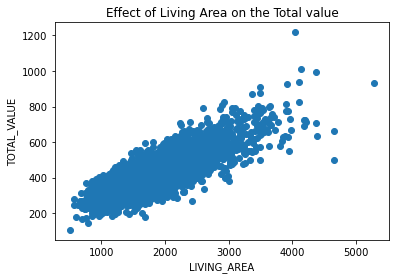

In [48]:
#13# scatter plot of LIVING_AREA vs. TOTAL_VALUE
plt.scatter(ds['LIVING_AREA'],ds['TOTAL_VALUE'])  
plt.xlabel("LIVING_AREA")                                    
plt.ylabel("TOTAL_VALUE")   
plt.title("Effect of Living Area on the Total value")
plt.show()

In [49]:
#14 Correlation between the attributes
Co = ds.corr()
Co.style.background_gradient(cmap='PuBuGn')

,TOTAL_VALUE,LOT_SQFT,YR_BUILT,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE
TOTAL_VALUE,1.000000,0.546599,-0.121120,0.835988,0.481270,0.637181,0.558398,0.427937,0.348349,0.018769,0.355394
LOT_SQFT,0.546599,1.000000,-0.093364,0.425286,0.073161,0.307301,0.251931,0.200012,0.136127,0.044703,0.181146
YR_BUILT,-0.121120,-0.093364,1.000000,-0.162704,-0.261120,-0.195399,-0.172551,0.122209,0.093139,0.072251,0.129885
LIVING_AREA,0.835988,0.425286,-0.162704,1.000000,0.475937,0.720036,0.637420,0.433040,0.302140,0.083659,0.258057
FLOORS,0.481270,0.073161,-0.261120,0.475937,1.000000,0.434371,0.431600,0.110122,0.315978,-0.114510,0.119288
ROOMS,0.637181,0.307301,-0.195399,0.720036,0.434371,1.000000,0.708364,0.371619,0.284190,0.131141,0.199842
BEDROOMS,0.558398,0.251931,-0.172551,0.637420,0.431600,0.708364,1.000000,0.326258,0.258260,0.086314,0.158844
FULL_BATH,0.427937,0.200012,0.122209,0.433040,0.110122,0.371619,0.326258,1.000000,-0.133011,0.147894,0.134527
HALF_BATH,0.348349,0.136127,0.093139,0.302140,0.315978,0.284190,0.258260,-0.133011,1.000000,-0.019963,0.175953
KITCHEN,0.018769,0.044703,0.072251,0.083659,-0.114510,0.131141,0.086314,0.147894,-0.019963,1.000000,-0.009308


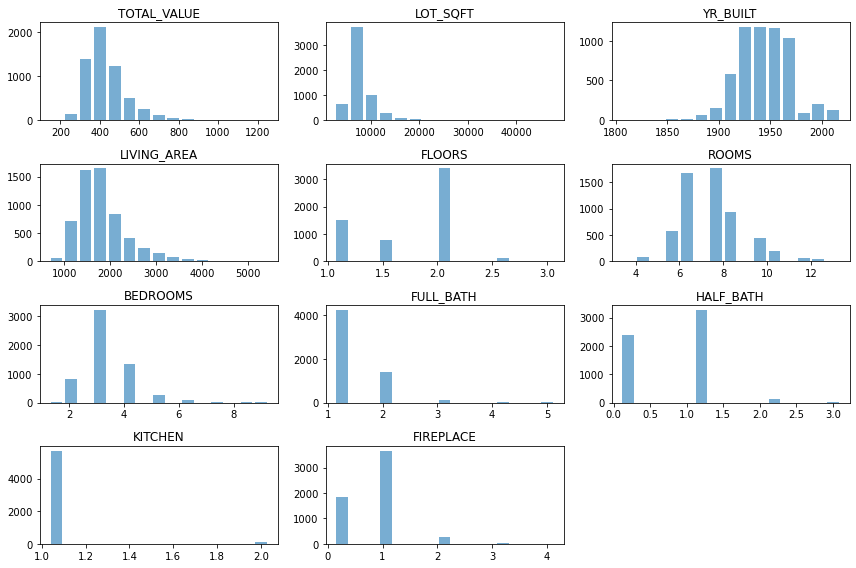

In [50]:
#15 Distribution of all columns
hist = ds.hist(bins=15,figsize=(12, 8),grid = False,rwidth = 0.8,align='right',histtype= 'barstacked',alpha=0.6,)
plt.title('Distribution of all the columns')
plt.tight_layout()

In [51]:
#16 Get summary statistics of the dataset
print(ds.describe())

       TOTAL_VALUE      LOT_SQFT     YR_BUILT  LIVING_AREA       FLOORS  \
count  5793.000000   5793.000000  5793.000000  5793.000000  5793.000000   
mean    392.346801   6275.692387  1937.058174  1655.235629     1.683238   
std      98.844294   2667.863747    25.426573   538.224005     0.445055   
min     105.000000    997.000000  1798.000000   504.000000     1.000000   
25%     325.000000   4770.000000  1920.000000  1306.000000     1.000000   
50%     375.800000   5682.000000  1935.000000  1546.000000     2.000000   
75%     438.400000   7020.000000  1955.000000  1872.000000     2.000000   
max    1217.800000  46411.000000  2011.000000  5289.000000     3.000000   

             ROOMS     BEDROOMS    FULL_BATH    HALF_BATH      KITCHEN  \
count  5793.000000  5793.000000  5793.000000  5793.000000  5793.000000   
mean      6.988434     3.227171     1.294839     0.613326     1.015363   
std       1.423839     0.842074     0.519711     0.533390     0.123004   
min       3.000000     1.000

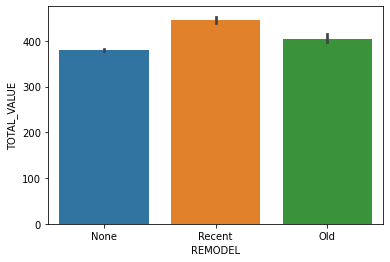

In [52]:
#17 barplot for Remodel
sns.barplot(x="REMODEL", y="TOTAL_VALUE", data=ds)
plt.show()

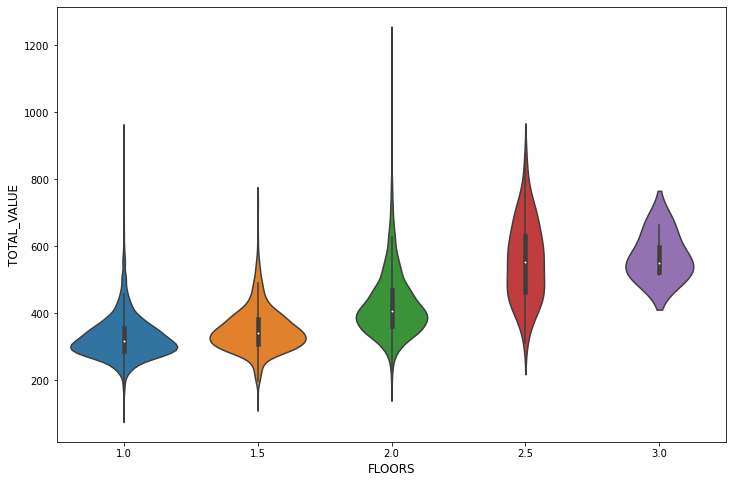

In [53]:
#18
#voilin plot to study the distribution of the data
plt.figure(figsize=(12,8))
sns.violinplot(x='FLOORS', y='TOTAL_VALUE', data=ds)
plt.xlabel('FLOORS', fontsize=12)
plt.ylabel('TOTAL_VALUE', fontsize=12)
plt.show()

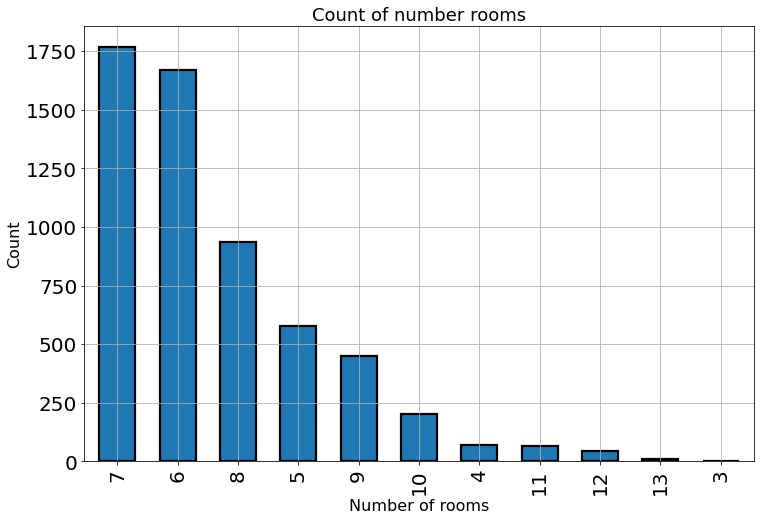

In [54]:
#19 Plot for Rooms
fig, ax=plt.subplots(figsize=(12,8))
ds['ROOMS'].value_counts().sort_values(ascending=False).head(12).plot.bar(width=0.6,edgecolor='black',align='center',linewidth=2.2)
plt.xlabel('Number of rooms',fontsize=16)
plt.ylabel('Count',fontsize=16)
ax.tick_params(labelsize=20)
plt.title('Count of number rooms',fontsize=18)
plt.grid()
plt.ioff()

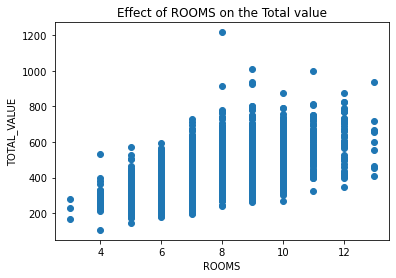

In [55]:
plt.scatter(ds['ROOMS'],ds['TOTAL_VALUE'])  
plt.xlabel("ROOMS")                                    
plt.ylabel("TOTAL_VALUE")   
plt.title("Effect of ROOMS on the Total value")
plt.show()

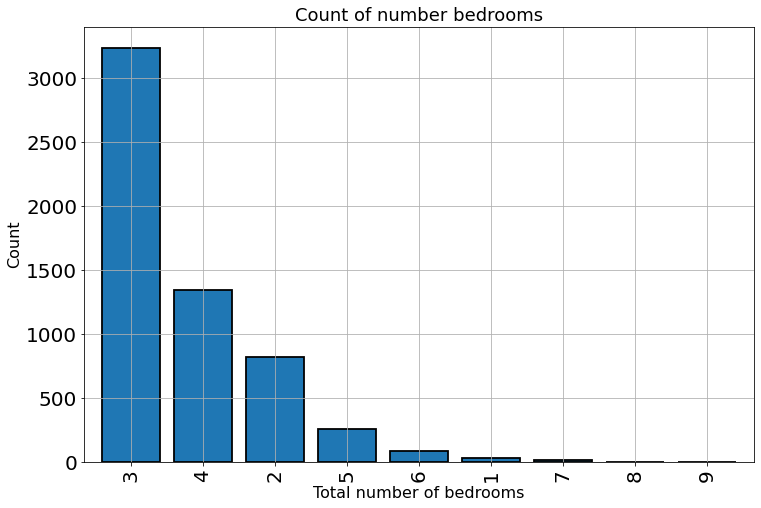

In [56]:
#20 Plot for BedRooms
fig, ax=plt.subplots(figsize=(12,8))
ds['BEDROOMS'].value_counts().sort_values(ascending=False).head(9).plot.bar(width=0.8,edgecolor='black',align='center',linewidth=1.8)
plt.xlabel('Total number of bedrooms',fontsize=16)
plt.ylabel('Count',fontsize=16)
ax.tick_params(labelsize=20)
plt.title('Count of number bedrooms',fontsize=18)
ax.grid()
plt.ioff()

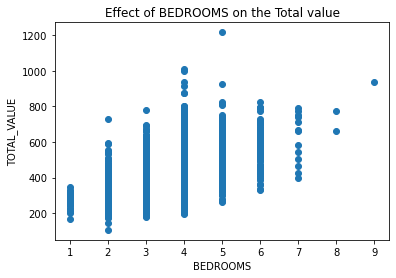

In [57]:
plt.scatter(ds['BEDROOMS'],ds['TOTAL_VALUE'])  
plt.xlabel("BEDROOMS")                                    
plt.ylabel("TOTAL_VALUE")   
plt.title("Effect of BEDROOMS on the Total value")
plt.show()

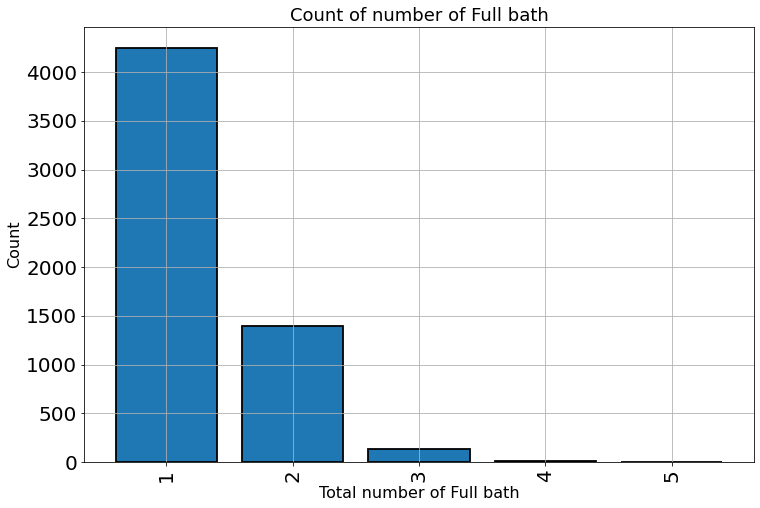

In [58]:
#21 Plot for FULL BATH
fig, ax=plt.subplots(figsize=(12,8))
ds['FULL_BATH'].value_counts().sort_values(ascending=False).head(5).plot.bar(width=0.8,edgecolor='black',align='center',linewidth=1.8)
plt.xlabel('Total number of Full bath',fontsize=16)
plt.ylabel('Count',fontsize=16)
ax.tick_params(labelsize=20)
plt.title('Count of number of Full bath',fontsize=18)
ax.grid()
plt.show()

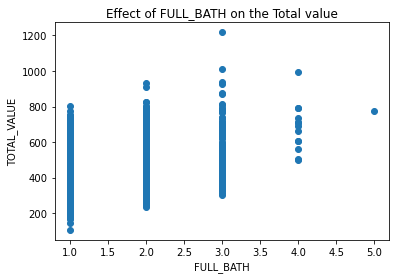

In [59]:
plt.scatter(ds['FULL_BATH'],ds['TOTAL_VALUE'])  
plt.xlabel("FULL_BATH")                                    
plt.ylabel("TOTAL_VALUE")   
plt.title("Effect of FULL_BATH on the Total value")
plt.show()

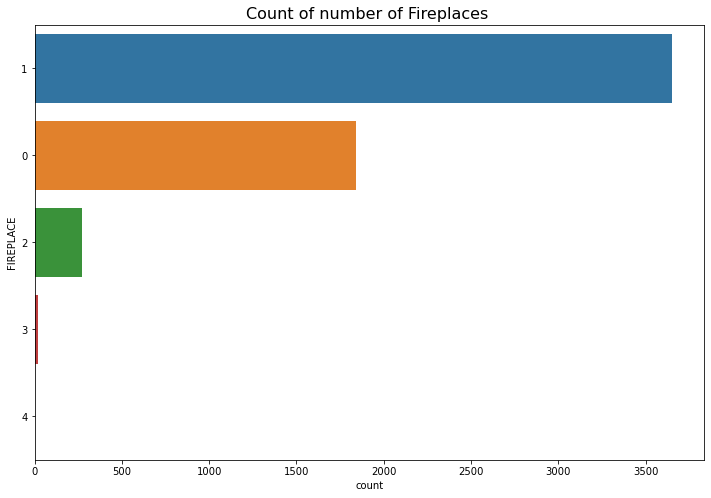

In [60]:
#22 Plot for fireplace
fig = plt.figure(figsize = (12, 8))
sns.countplot(y='FIREPLACE', data=ds, order=ds['FIREPLACE'].value_counts()[0:15].index).set_title("Count of number of Fireplaces ", fontsize = 16)
plt.ioff()

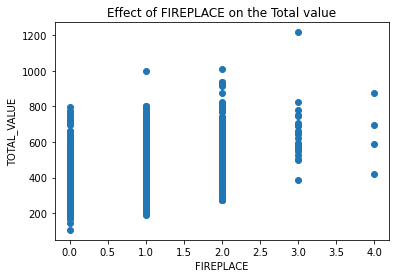

In [61]:
plt.scatter(ds['FIREPLACE'],ds['TOTAL_VALUE'])  
plt.xlabel("FIREPLACE")                                    
plt.ylabel("TOTAL_VALUE")   
plt.title("Effect of FIREPLACE on the Total value")
plt.show()

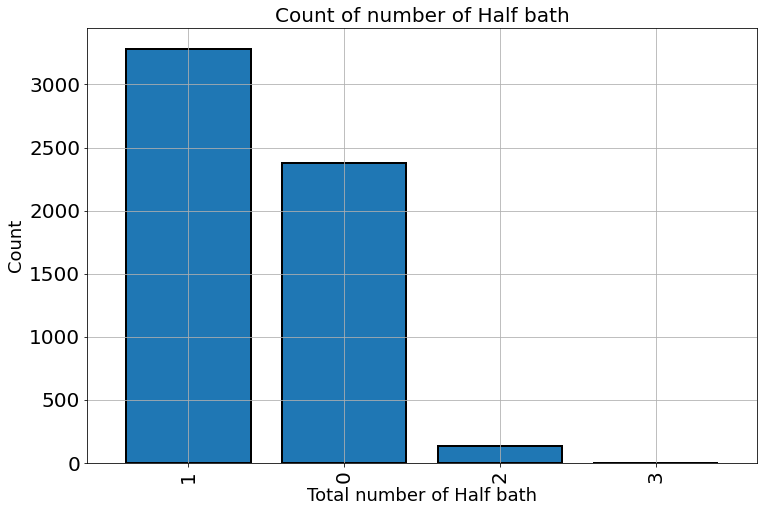

In [62]:
#23 Plot for half bath
fig, ax=plt.subplots(figsize=(12,8))
ds['HALF_BATH'].value_counts().sort_values(ascending=False).head(12).plot.bar(width=0.8,edgecolor='black',align='center',linewidth=2)
plt.xlabel('Total number of Half bath',fontsize=18)
plt.ylabel('Count',fontsize=18)
plt.title('Count of number of Half bath',fontsize=20)
ax.tick_params(labelsize=20)
ax.grid()
plt.ioff()

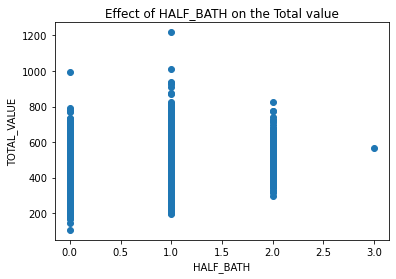

In [63]:
plt.scatter(ds['HALF_BATH'],ds['TOTAL_VALUE'])  
plt.xlabel("HALF_BATH")                                    
plt.ylabel("TOTAL_VALUE")   
plt.title("Effect of HALF_BATH on the Total value")
plt.show()

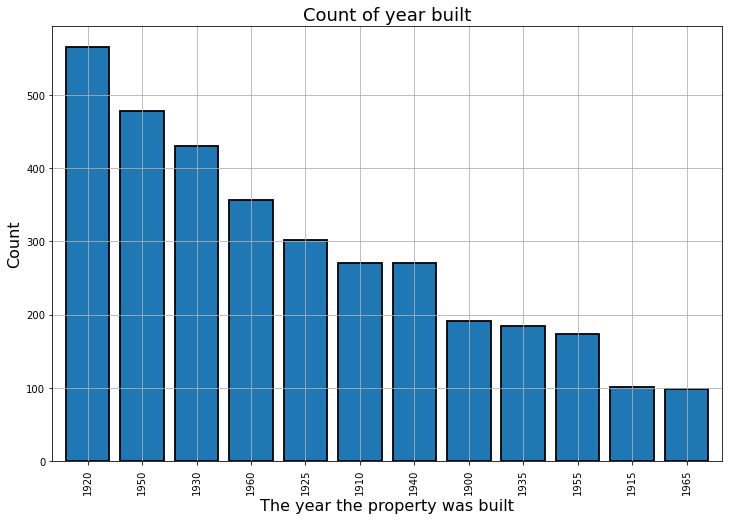

In [64]:
#24 Plot for Year built
fig, ax=plt.subplots(figsize=(12,8))
ds['YR_BUILT'].value_counts().sort_values(ascending=False).head(12).plot.bar(width=0.8,edgecolor='black',align='center',linewidth=1.8)
plt.xlabel('The year the property was built',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.title('Count of year built',fontsize=18)
ax.grid()
plt.ioff()

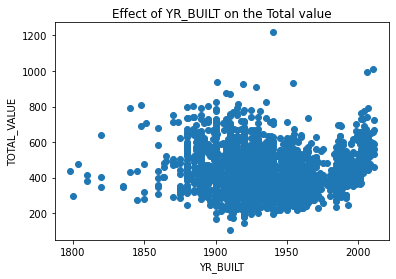

In [65]:
plt.scatter(ds['YR_BUILT'],ds['TOTAL_VALUE'])  
plt.xlabel("YR_BUILT")                                    
plt.ylabel("TOTAL_VALUE")   
plt.title("Effect of YR_BUILT on the Total value")
plt.show()

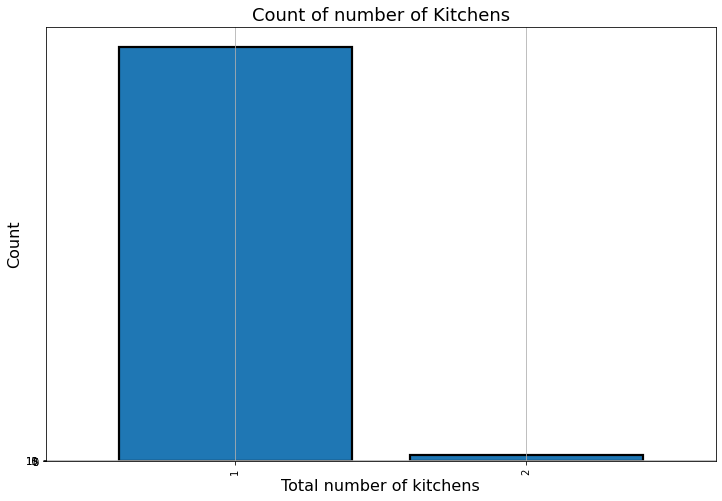

In [66]:
#25 Plot for Kitchen
fig, ax=plt.subplots(figsize=(12,8))
ds['KITCHEN'].value_counts().sort_values(ascending=False).head(2).plot.bar(width=0.8,edgecolor='black',align='center',linewidth=2.2)
plt.xlabel('Total number of kitchens',fontsize=16)
plt.ylabel('Count',fontsize=16)
ax.set_yticks([0, 5, 10, 15])
plt.title('Count of number of Kitchens',fontsize=18)
ax.grid()
plt.show()

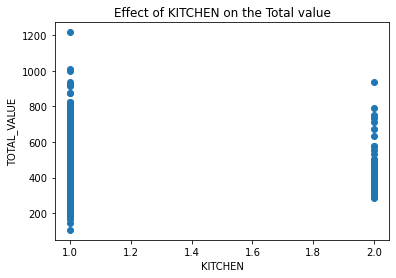

In [67]:
plt.scatter(ds['KITCHEN'],ds['TOTAL_VALUE'])  
plt.xlabel("KITCHEN")                                    
plt.ylabel("TOTAL_VALUE")   
plt.title("Effect of KITCHEN on the Total value")
plt.show()

<AxesSubplot:xlabel='LOT_SQFT'>

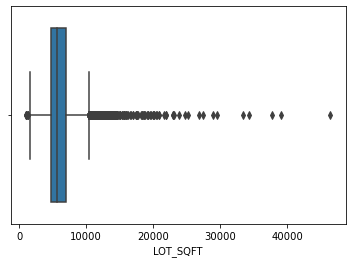

In [68]:
#26 Box plot for Lot size
sns.boxplot(x=ds['LOT_SQFT'])

<AxesSubplot:xlabel='LIVING_AREA', ylabel='Density'>

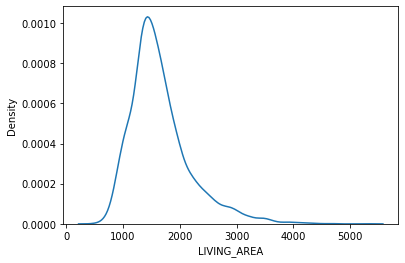

In [69]:
#27 Plot for Living area
sns.kdeplot(ds['LIVING_AREA'])

In [70]:
#28 Encode categorical data
ds = pd.get_dummies(ds,columns=['REMODEL'])


In [71]:
ds = pd.get_dummies(ds, drop_first = True)

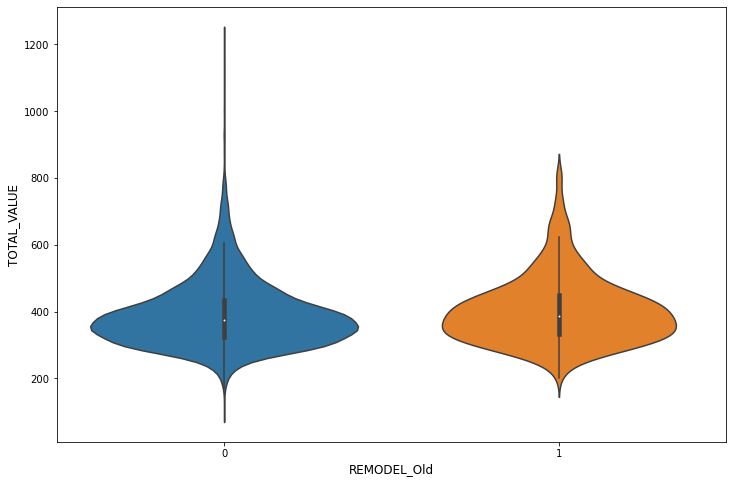

In [72]:
#29 Violin plot after data cleaning
plt.figure(figsize=(12,8))
sns.violinplot(x='REMODEL_Old',y='TOTAL_VALUE', data=ds)
plt.xlabel('REMODEL_Old', fontsize=12)
plt.ylabel('TOTAL_VALUE', fontsize=12)
plt.show()

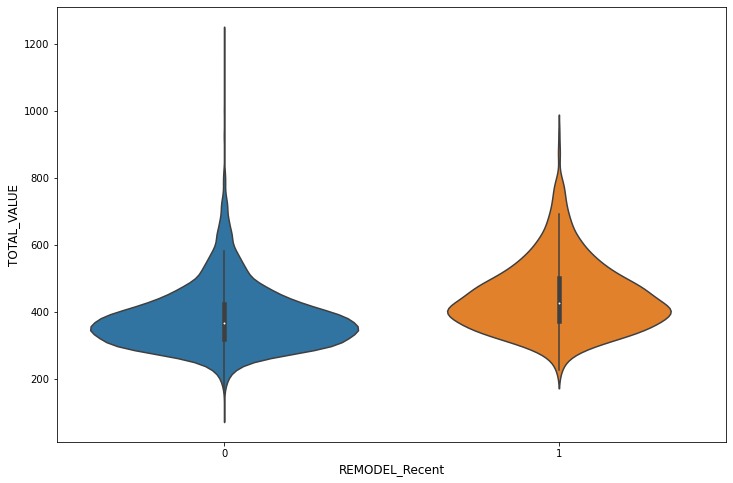

In [73]:
plt.figure(figsize=(12,8))
sns.violinplot(x='REMODEL_Recent',y='TOTAL_VALUE', data=ds)
plt.xlabel('REMODEL_Recent', fontsize=12)
plt.ylabel('TOTAL_VALUE', fontsize=12)
plt.show()

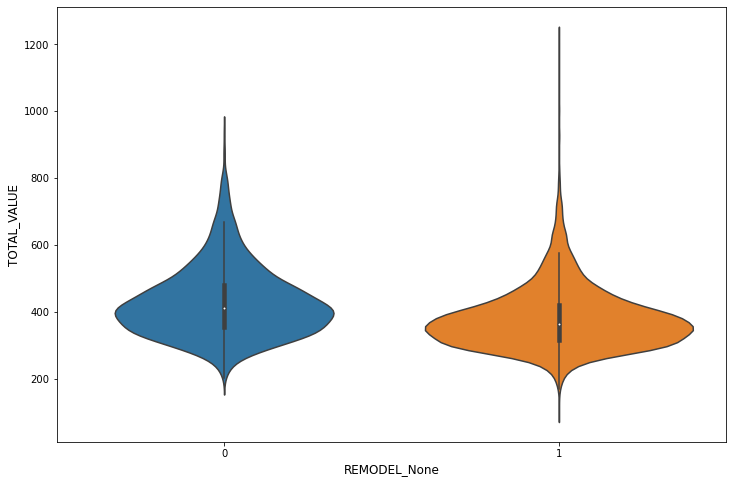

In [74]:
plt.figure(figsize=(12,8))
sns.violinplot(x='REMODEL_None',y='TOTAL_VALUE', data=ds)
plt.xlabel('REMODEL_None', fontsize=12)
plt.ylabel('TOTAL_VALUE', fontsize=12)
plt.show()

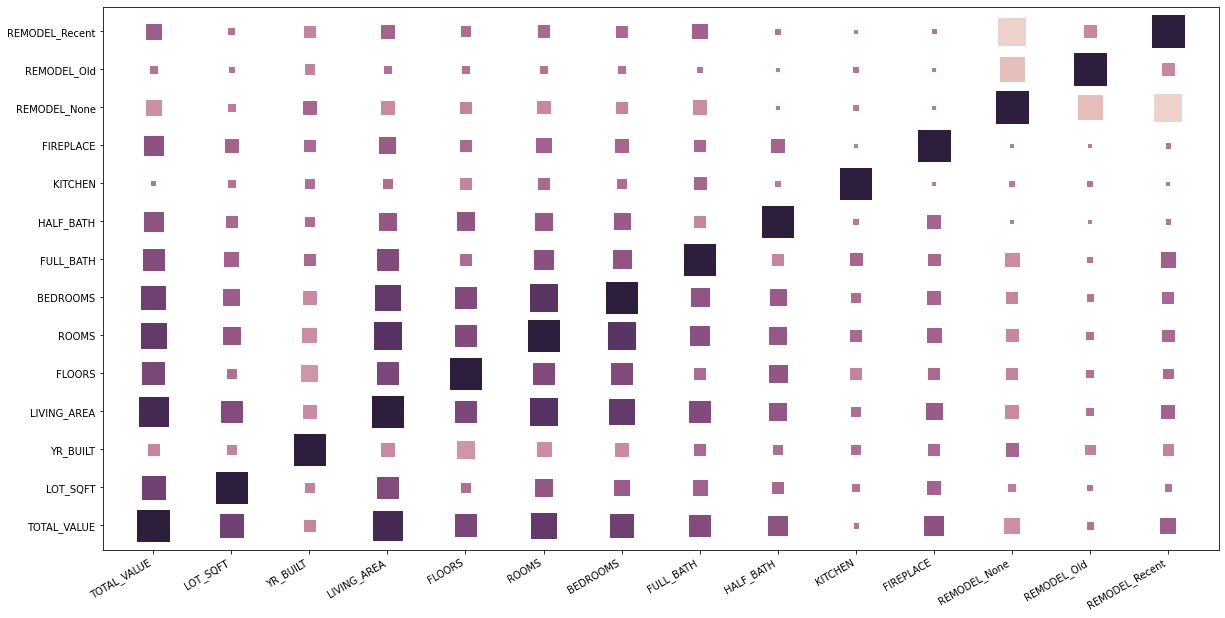

In [75]:
#30 Heat map
def value_to_color(val):
        ind = int((float(val - corr['value'].min()) / (corr['value'].max() - corr['value'].min()))*255)
        return palette[ind]
corr = ds.corr()
corr = pd.melt(corr.reset_index(), id_vars='index') 
fig, ax = plt.subplots(figsize=(20,10))
n_colors = 256
palette = sns.cubehelix_palette(n_colors) 
color_min, color_max = [-1, 1] 

ax.scatter(
    x = corr['index'].map({p[1]:p[0] for p in enumerate(ds.columns)}),
    y = corr['variable'].map({p[1]:p[0] for p in enumerate(ds.columns)}),
    s = corr['value'].abs() * 1000,
    c = corr['value'].apply(value_to_color), 
    marker='s')
ax.set_xticks([x for x in range(len(ds.columns))])
ax.set_xticklabels(ds.columns, rotation=30, horizontalalignment='right')
ax.set_yticks([x for x in range(len(ds.columns))])
ax.set_yticklabels(ds.columns)
plt.show()

In [76]:
predictors_df1 = ds[['LOT_SQFT', 'YR_BUILT', 'LIVING_AREA', 'FLOORS', 'ROOMS','BEDROOMS', 'FULL_BATH', 'HALF_BATH', 
              'KITCHEN', 'FIREPLACE','REMODEL_Old', 'REMODEL_Recent']]
response_df = ds['TOTAL_VALUE']

In [77]:
z_score_norm = preprocessing.StandardScaler()
predictor_df_normalized = z_score_norm.fit_transform(predictors_df1)
predictor_df_normalized = pd.DataFrame(predictor_df_normalized, columns = predictors_df1.columns)
predictor_df_normalized

,LOT_SQFT,YR_BUILT,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL_Old,REMODEL_Recent
0,1.382989,-2.244231,-0.563449,0.711798,-0.694264,-0.269798,-0.567362,0.724999,-0.124912,-1.309810,-0.333557,-0.420951
1,0.117823,0.312371,0.596020,0.711798,2.115285,0.917848,1.356951,0.724999,-0.124912,-1.309810,-0.333557,2.375573
2,0.458949,-1.850908,-0.528145,0.711798,0.710511,0.917848,-0.567362,0.724999,-0.124912,-1.309810,-0.333557,-0.420951
3,2.810471,0.784358,1.770353,-1.535311,1.412898,2.105494,-0.567362,0.724999,-0.124912,0.463438,-0.333557,-0.420951
4,-0.478211,-1.064261,-0.403650,0.711798,0.008124,-0.269798,1.356951,-1.149965,-0.124912,-1.309810,-0.333557,-0.420951
...,...,...,...,...,...,...,...,...,...,...,...,...
5788,0.182299,0.037044,0.109191,0.711798,1.412898,-0.269798,1.356951,0.724999,-0.124912,0.463438,-0.333557,2.375573
5789,1.174190,0.509032,-0.598753,0.711798,-0.694264,-0.269798,-0.567362,0.724999,-0.124912,0.463438,-0.333557,-0.420951
5790,0.345740,1.964328,0.034867,0.711798,0.008124,-0.269798,-0.567362,0.724999,-0.124912,0.463438,-0.333557,-0.420951
5791,0.230282,0.351703,-1.217508,-1.535311,-1.396651,-1.457445,-0.567362,-1.149965,-0.124912,-1.309810,-0.333557,-0.420951


# 1. Multiple Linear Regression

In [78]:
model_accuracies = {}

In [79]:
from sklearn.metrics import mean_squared_error
import math
model_rmse = {}

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from dmba import regressionSummary, adjusted_r2_score

In [81]:
# partition data into train and test sets
X = predictor_df_normalized
y = response_df
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=1)

In [82]:
# train the LR model
linear_model = LinearRegression()
linear_model = linear_model.fit(train_X, train_y)

In [83]:
# print the coefficients
print('intercept ', linear_model.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': linear_model.coef_}))

intercept  392.25067740098706
         Predictor  coefficient
0         LOT_SQFT    23.776453
1         YR_BUILT     0.612952
2      LIVING_AREA    54.562903
3           FLOORS    12.221726
4            ROOMS     1.451933
5         BEDROOMS    -0.494871
6        FULL_BATH    10.782795
7        HALF_BATH    10.082609
8          KITCHEN    -3.820541
9        FIREPLACE    11.966619
10     REMODEL_Old     1.695665
11  REMODEL_Recent     8.587227


In [84]:
# print performance metrics on training set using regressionSummary()
predicted_y_training = linear_model.predict(train_X)
regressionSummary(train_y, predicted_y_training)


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 44.1851
            Mean Absolute Error (MAE) : 33.5804
          Mean Percentage Error (MPE) : -1.1689
Mean Absolute Percentage Error (MAPE) : 8.7926


In [85]:
# deploy the model on the test data
predicted_y_test = linear_model.predict(test_X)

result = pd.DataFrame({'Predicted': predicted_y_test, 'Actual': test_y,
                       'Residual': test_y - predicted_y_test})

In [86]:
# Checking the model performance in prediction
regressionSummary(test_y, predicted_y_test)


Regression statistics

                      Mean Error (ME) : 0.3204
       Root Mean Squared Error (RMSE) : 44.2349
            Mean Absolute Error (MAE) : 33.1262
          Mean Percentage Error (MPE) : -1.0285
Mean Absolute Percentage Error (MAPE) : 8.6670


In [87]:
# Checking for accuracy
accuracy = linear_model.score(test_X, test_y)
accuracy

0.8003645918117761

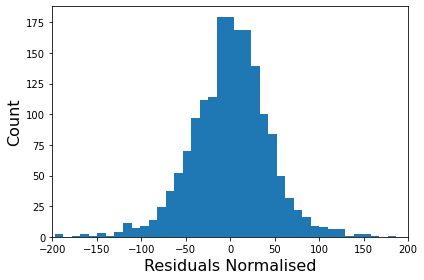

In [88]:
# Checking if our residuals are normally distributed
residuals = test_y - predicted_y_test
plt.hist(residuals, bins = 50)
plt.xlim([-200,200])
plt.xlabel('Residuals Normalised',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.tight_layout()

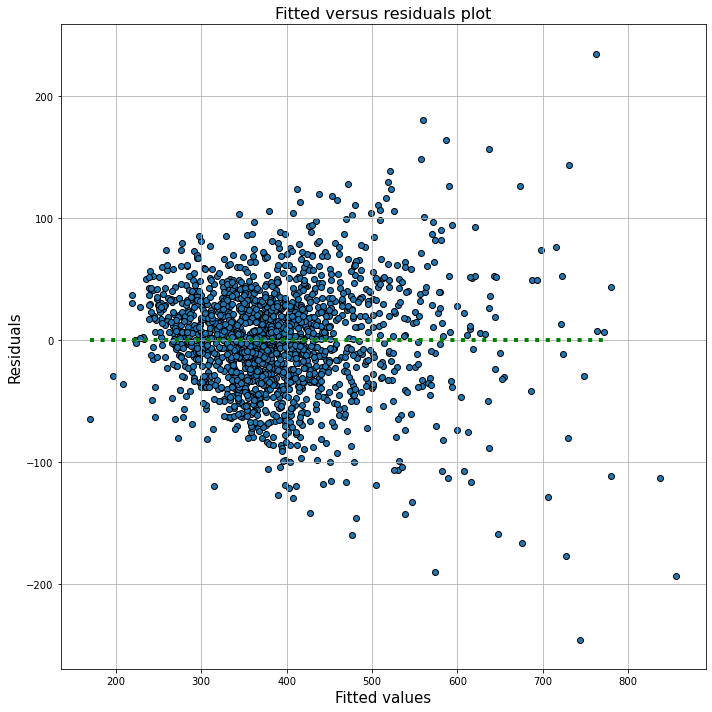

In [89]:
# Fitted vs. Residuals Plot
plt.figure(figsize=(10,10))
p=plt.scatter(x=predicted_y_test,y=residuals,edgecolor='k')
xmin = predicted_y_test.min()
xmax = max(predicted_y_test)
plt.hlines(y=0,xmin=xmin*1,xmax=xmax*0.9,color='green',linestyle=':',lw=4)
plt.xlabel("Fitted values",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Fitted versus residuals plot",fontsize=16)
plt.grid(True)
plt.tight_layout()

In [90]:
model_accuracies['Linear regression'] = accuracy
model_rmse['Linear regression'] = math.sqrt(mean_squared_error(train_y, predicted_y_training))

# Statsmodels

In [91]:
import statsmodels.api as sm

In [92]:
# train the  model
train_X = sm.add_constant(train_X)
test_X = sm.add_constant(test_X)

linear_model2 = sm.OLS(list(train_y), train_X).fit()
linear_model2.params

const             392.250677
LOT_SQFT           23.776453
YR_BUILT            0.612952
LIVING_AREA        54.562903
FLOORS             12.221726
ROOMS               1.451933
BEDROOMS           -0.494871
FULL_BATH          10.782795
HALF_BATH          10.082609
KITCHEN            -3.820541
FIREPLACE          11.966619
REMODEL_Old         1.695665
REMODEL_Recent      8.587227
dtype: float64

In [93]:
# print the coefficients
print('intercept ', linear_model.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': linear_model.coef_}))

intercept  392.25067740098706
         Predictor  coefficient
0         LOT_SQFT    23.776453
1         YR_BUILT     0.612952
2      LIVING_AREA    54.562903
3           FLOORS    12.221726
4            ROOMS     1.451933
5         BEDROOMS    -0.494871
6        FULL_BATH    10.782795
7        HALF_BATH    10.082609
8          KITCHEN    -3.820541
9        FIREPLACE    11.966619
10     REMODEL_Old     1.695665
11  REMODEL_Recent     8.587227


In [94]:
# print performance metrics on training set using regressionSummary()
predicted_y_training2 = linear_model2.predict(train_X)
regressionSummary(train_y, predicted_y_training2)


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 44.1851
            Mean Absolute Error (MAE) : 33.5804
          Mean Percentage Error (MPE) : -1.1689
Mean Absolute Percentage Error (MAPE) : 8.7926


In [95]:
# deploy the model on the test data
predicted_y_test2 = linear_model2.predict(test_X)

In [96]:
# Checking the model performance in prediction
regressionSummary(test_y, predicted_y_test2)


Regression statistics

                      Mean Error (ME) : 0.3204
       Root Mean Squared Error (RMSE) : 44.2349
            Mean Absolute Error (MAE) : 33.1262
          Mean Percentage Error (MPE) : -1.0285
Mean Absolute Percentage Error (MAPE) : 8.6670


In [97]:
print(linear_model2.pvalues.round(4))

const             0.0000
LOT_SQFT          0.0000
YR_BUILT          0.4425
LIVING_AREA       0.0000
FLOORS            0.0000
ROOMS             0.2066
BEDROOMS          0.6328
FULL_BATH         0.0000
HALF_BATH         0.0000
KITCHEN           0.0000
FIREPLACE         0.0000
REMODEL_Old       0.0167
REMODEL_Recent    0.0000
dtype: float64


In [98]:
#drop the variables that are not significant (i.e., p>0.05)
train_X = train_X.drop(["YR_BUILT","ROOMS","BEDROOMS"], axis = 1)
test_X = test_X.drop(["YR_BUILT","ROOMS","BEDROOMS"], axis = 1)

In [99]:
linear_model3 = sm.OLS(list(train_y), train_X).fit()
predicted_y_training3 = linear_model3.predict(train_X)
regressionSummary(train_y, predicted_y_training3)


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 44.1958
            Mean Absolute Error (MAE) : 33.6046
          Mean Percentage Error (MPE) : -1.1717
Mean Absolute Percentage Error (MAPE) : 8.7989


In [100]:
predicted_y_test3 = linear_model3.predict(test_X)
regressionSummary(test_y, predicted_y_test3)


Regression statistics

                      Mean Error (ME) : 0.3043
       Root Mean Squared Error (RMSE) : 44.2694
            Mean Absolute Error (MAE) : 33.1459
          Mean Percentage Error (MPE) : -1.0353
Mean Absolute Percentage Error (MAPE) : 8.6718


In [101]:
# Checking for accuracy
accuracy = linear_model3.rsquared
accuracy

0.7997408905769834

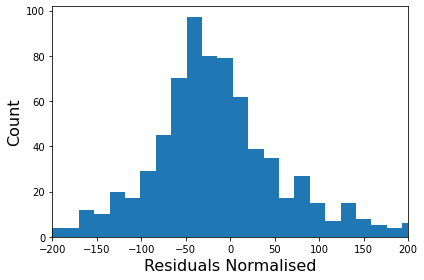

In [102]:
# Checking if our residuals are normally distributed
residuals = test_y - predicted_y_test3
plt.hist(residuals, bins = 50)
plt.xlim([-200,200])
plt.xlabel('Residuals Normalised',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.tight_layout()

# 2. Decision tree

In [103]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report, mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [104]:
# partition data into train and test sets
X_prediction = predictors_df1
y_prediction = response_df
train_X_prediction, test_X_prediction, train_y_prediction, test_y_prediction = train_test_split(X_prediction, 
                                                            y_prediction, test_size=0.3, random_state=616)

In [105]:
# normalise using Z-score
z_score_norm2 = preprocessing.StandardScaler()
z_score_norm2.fit(predictors_df1)

train_X_prediction = pd.DataFrame(z_score_norm2.transform(train_X_prediction), 
                                          columns = predictors_df1.columns)
test_X_prediction = pd.DataFrame(z_score_norm2.transform(test_X_prediction), 
                                          columns = predictors_df1.columns)

In [106]:
# train the Decision tree model
WestRoxbury = DecisionTreeRegressor(max_depth=5, random_state=13, splitter="best").fit(train_X_prediction, train_y_prediction) #not allowing it to grow fully,by setting max depth to 7
predicted_y_training_Rox = WestRoxbury.predict(train_X_prediction)

In [107]:
print("Root Mean Squared Error (RMSE): ", round(mean_squared_error(train_y_prediction, predicted_y_training_Rox) ** 0.5, 4))

Root Mean Squared Error (RMSE):  46.7916


In [108]:
predicted_y_test_Rox = WestRoxbury.predict(test_X_prediction)

In [109]:
print("Root Mean Squared Error (RMSE): ", round(mean_squared_error(test_y_prediction, predicted_y_test_Rox) ** 0.5, 4))

Root Mean Squared Error (RMSE):  49.7434


In [110]:
r2 = r2_score(test_y_prediction ,predicted_y_test_Rox)
r2

0.7443605064265439

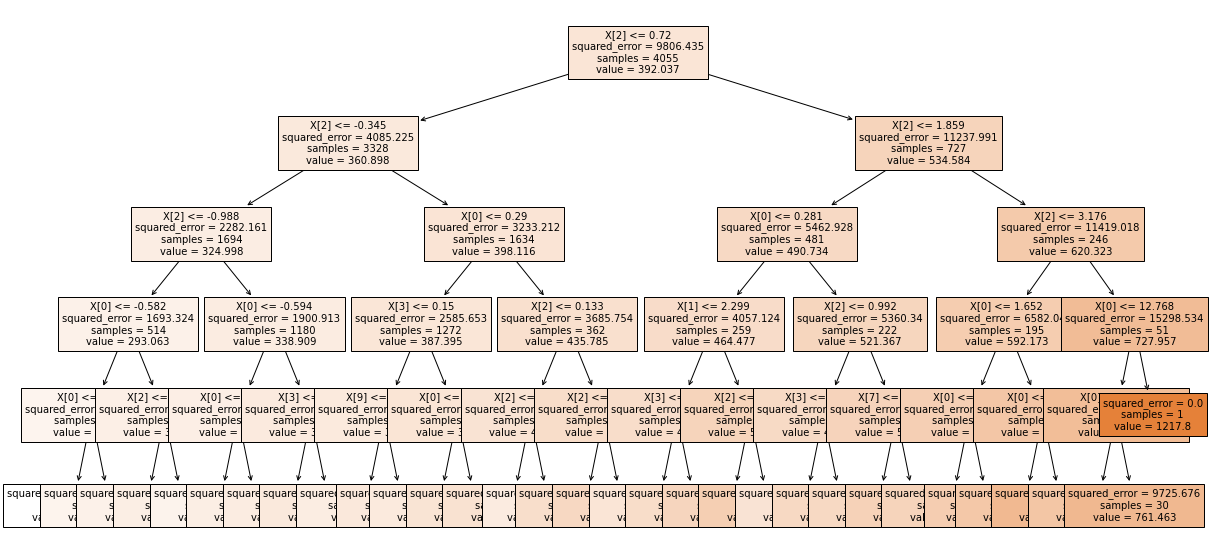

In [111]:
# Decision tree for our dataset
plt.figure(figsize=(20,10))
plot_tree(WestRoxbury, filled=True,fontsize=10)
plt.savefig('Decision_tree.png', dpi=300)
plt.show()

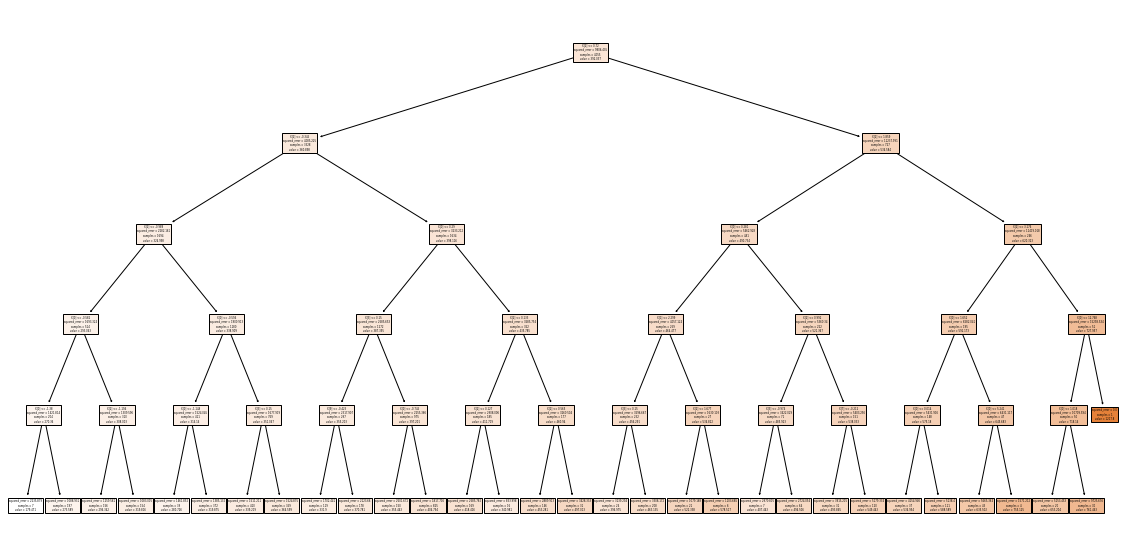

In [112]:
# Decision tree for our dataset
plt.figure(figsize=(20,10))
plot_tree(WestRoxbury, filled=True)
plt.show()

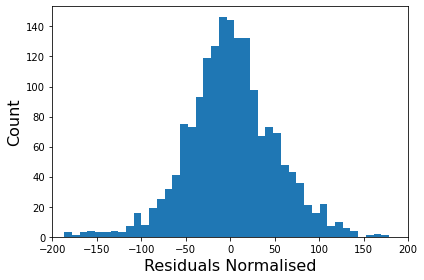

In [113]:
# Checking if our residuals are normally distributed
residuals = test_y_prediction - predicted_y_test_Rox
plt.hist(residuals, bins = 50)
plt.xlim([-200,200])
plt.xlabel('Residuals Normalised',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.tight_layout()

<AxesSubplot:>

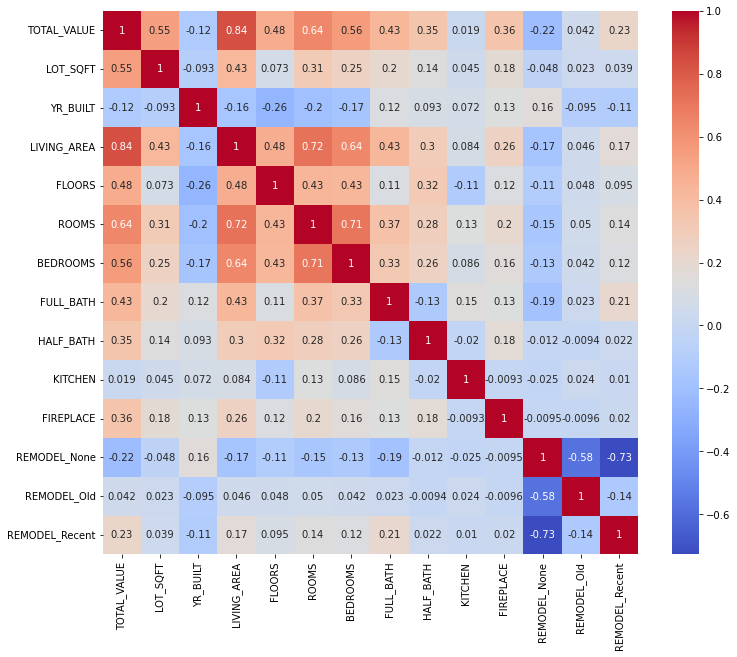

In [114]:
# Confusion matrix for our dataset
import seaborn as sns
plt.figure(figsize=(12,10))
sns.heatmap(ds.corr(),cmap='coolwarm',annot=True)

In [115]:
model_accuracies['Decision tree'] = r2
model_rmse['Decision tree'] = math.sqrt(mean_squared_error(test_y_prediction, predicted_y_test_Rox))

# 3. Random Forest Regressor

In [116]:
# Import libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [117]:
predictors_df1

,LOT_SQFT,YR_BUILT,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL_Old,REMODEL_Recent
0,9965,1880,1352,2.0,6,3,1,1,1,0,0,0
1,6590,1945,1976,2.0,10,4,2,1,1,0,0,1
2,7500,1890,1371,2.0,8,4,1,1,1,0,0,0
3,13773,1957,2608,1.0,9,5,1,1,1,1,0,0
4,5000,1910,1438,2.0,7,3,2,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5797,6762,1938,1714,2.0,9,3,2,1,1,1,0,1
5798,9408,1950,1333,2.0,6,3,1,1,1,1,0,0
5799,7198,1987,1674,2.0,7,3,1,1,1,1,0,0
5800,6890,1946,1000,1.0,5,2,1,0,1,0,0,0


In [118]:
response_df

0       344.2
1       412.6
2       330.1
3       498.6
4       331.5
        ...  
5797    404.8
5798    407.9
5799    406.5
5800    308.7
5801    447.6
Name: TOTAL_VALUE, Length: 5793, dtype: float64

In [119]:
# Loading dataset and split it into training and testing sets
X_prediction = predictors_df1
y_prediction = response_df
train_X_prediction, test_X_prediction, train_y_prediction, test_y_prediction = train_test_split(X_prediction, 
                                                            y_prediction, test_size=0.3, random_state=42)

In [120]:
# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(train_X_prediction, train_y_prediction)

RandomForestRegressor(random_state=42)

In [121]:
# Extract feature of importances
importances = model.feature_importances_

In [122]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

In [123]:
# Make predictions
y_pred_rf = model.predict(test_X_prediction)

In [124]:
# Evaluate the model
mse = mean_squared_error(test_y_prediction, y_pred_rf)
print("Mean Squared Error:", mse)

Mean Squared Error: 1931.1310401432556


In [125]:
print("Root Mean Squared Error (RMSE): ", round(math.sqrt(mse), 4))

Root Mean Squared Error (RMSE):  43.9446


In [126]:
predicted_y_training_corollas = model.predict(train_X_prediction)

In [127]:
print("Root Mean Squared Error (RMSE): ", round(mean_squared_error(train_y_prediction, predicted_y_training_corollas) ** 0.5, 4))

Root Mean Squared Error (RMSE):  15.7331


In [128]:
# Check R^2 of our test data
r2 = r2_score(test_y_prediction, y_pred_rf)
r2

0.8153383929101298

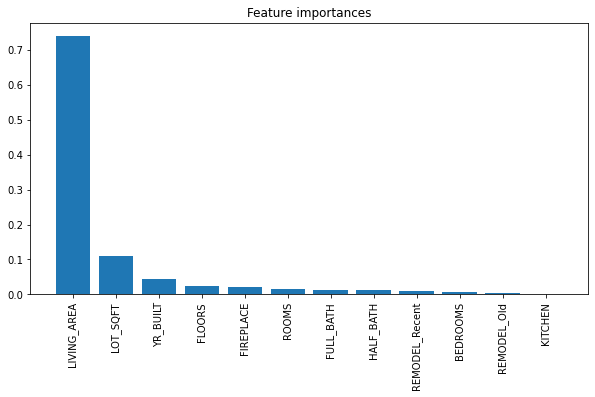

In [129]:
# Plot the feature importances using a bar plot
plt.figure(figsize=(10,5))
plt.title("Feature importances")
plt.bar(range(train_X_prediction.shape[1]), importances[indices])
plt.xticks(range(train_X_prediction.shape[1]), train_X_prediction.columns[indices], rotation=90)
plt.show()

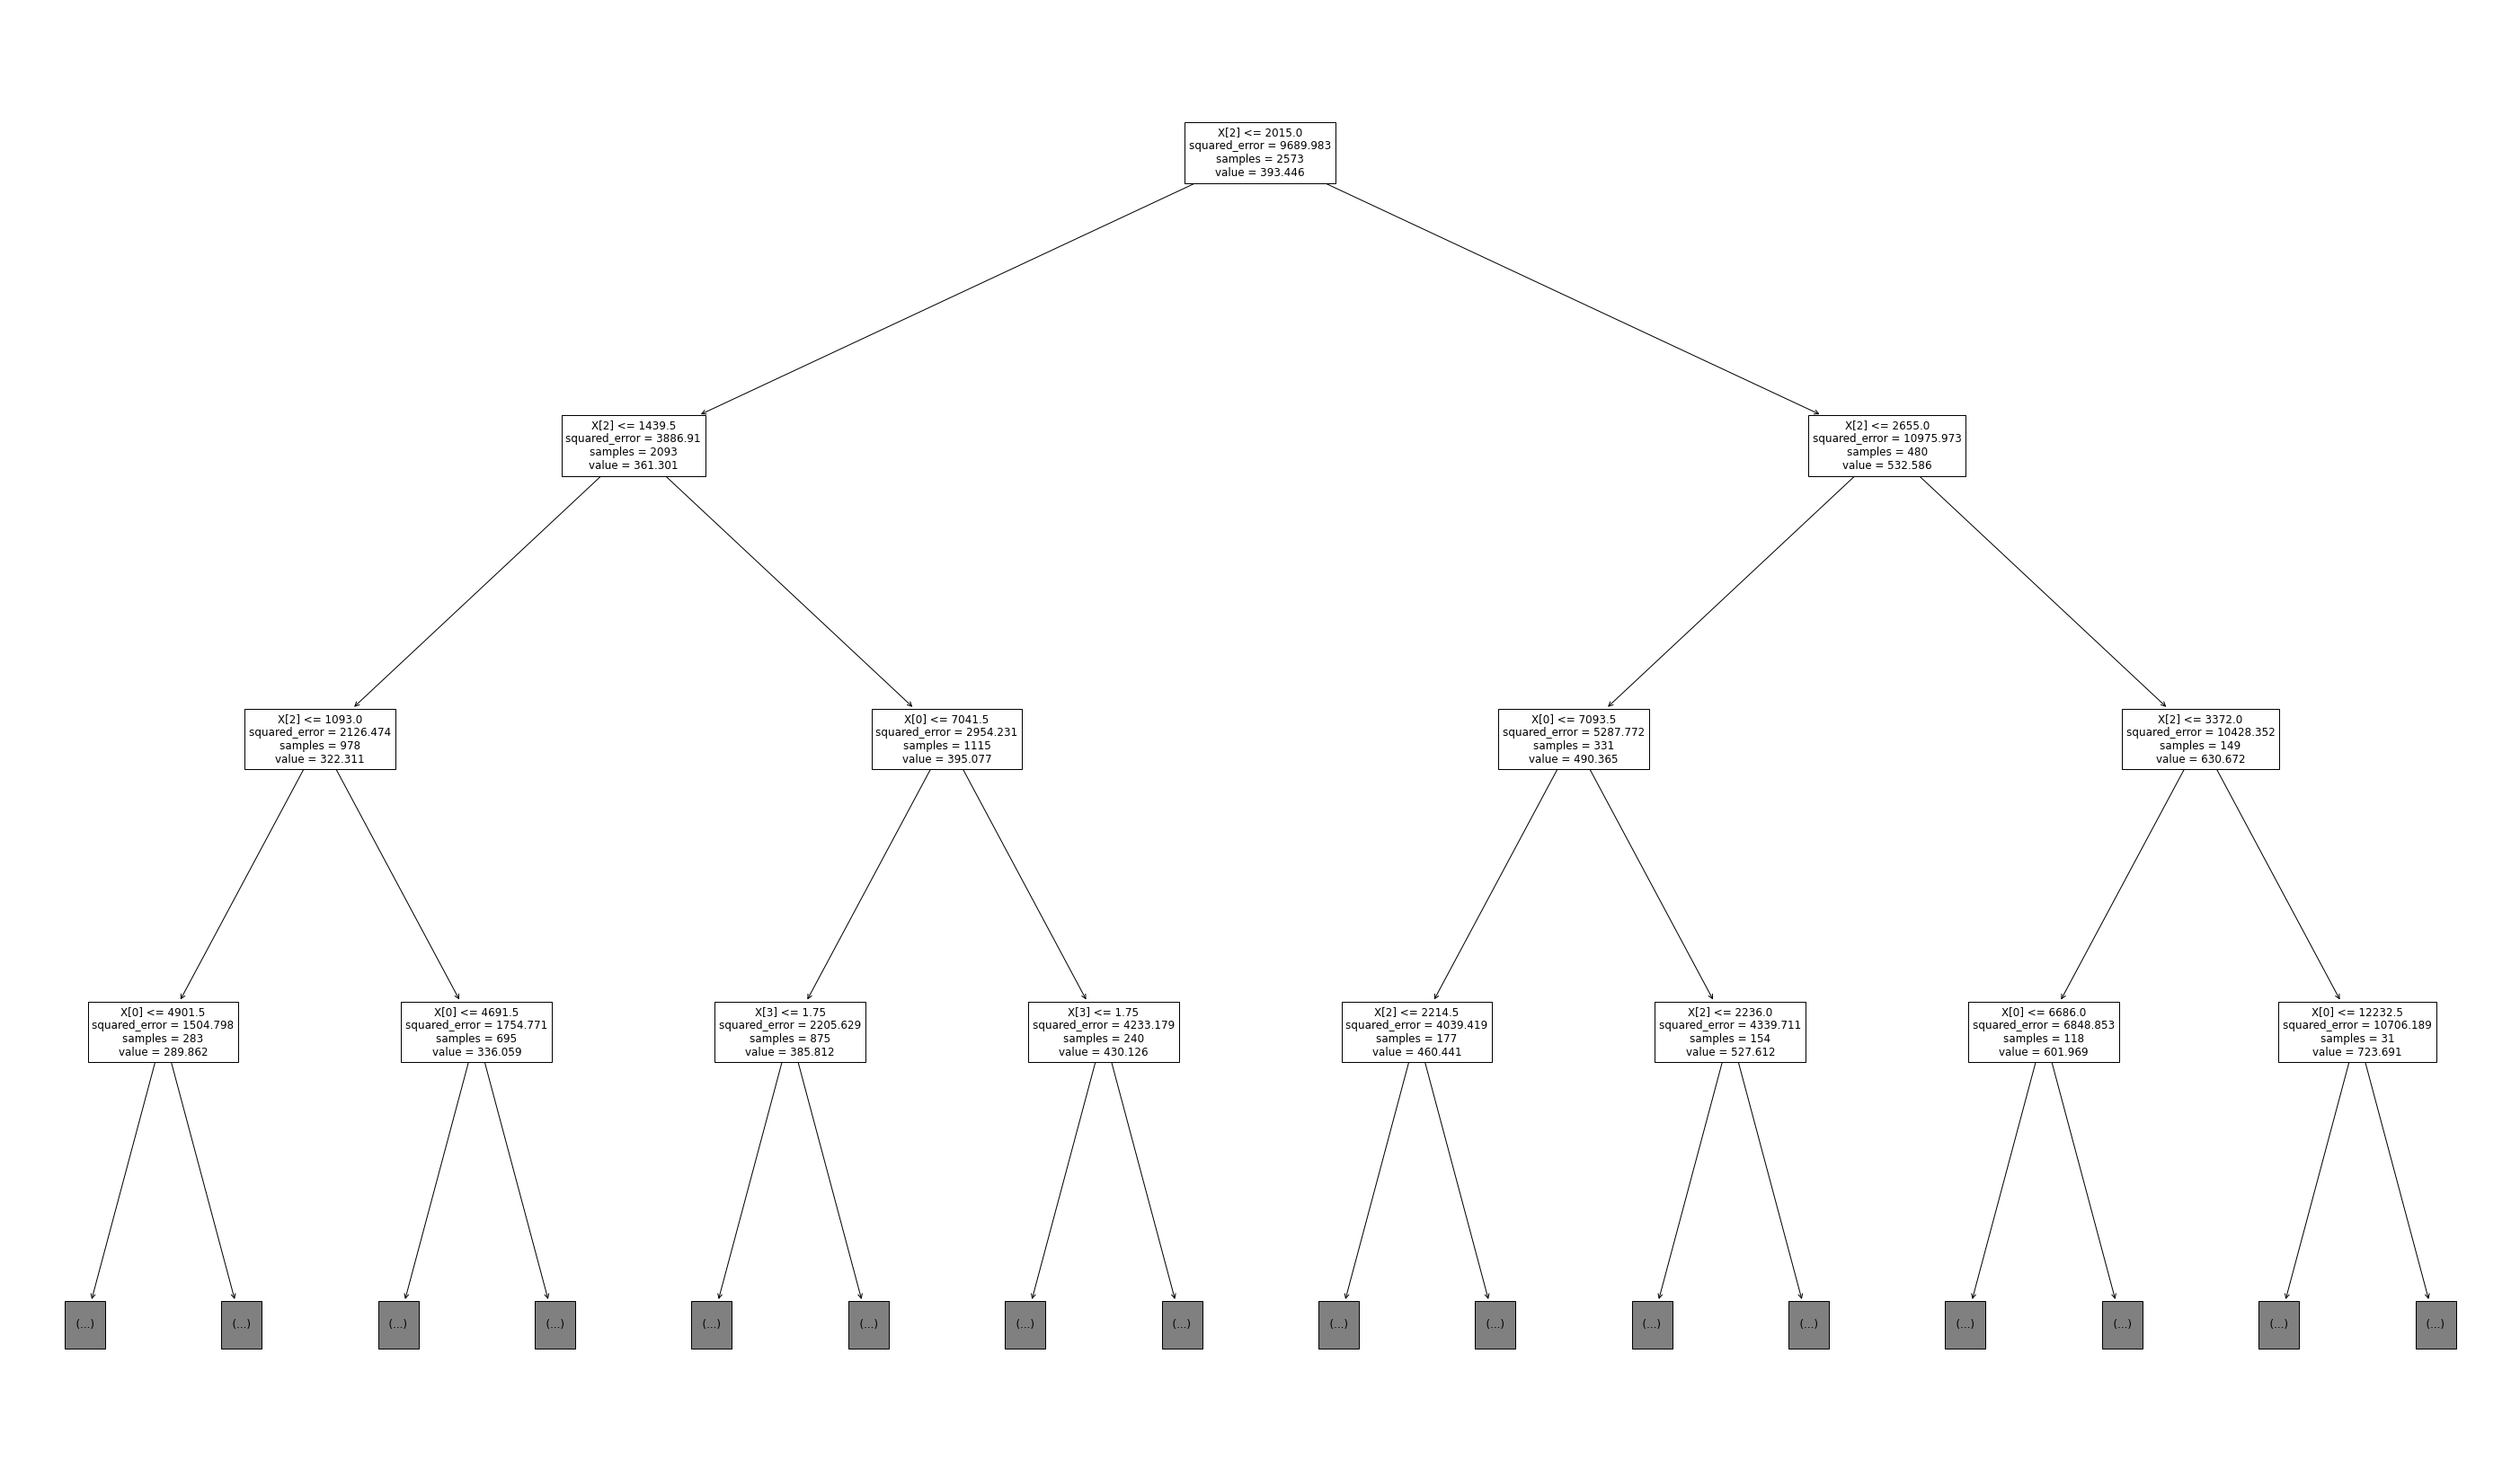

In [130]:
# Plot the first decision tree
fig, ax = plt.subplots(figsize=(50, 30))
plot_tree(model.estimators_[0], max_depth=3, ax=ax)
plt.show()

C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


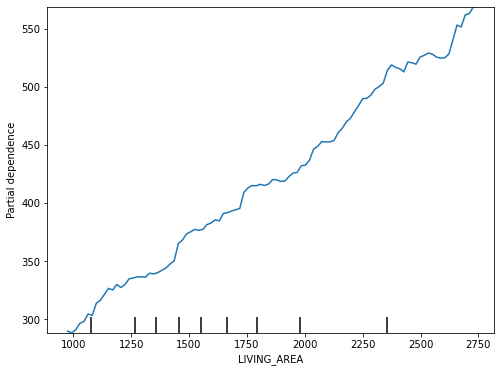

In [131]:
from sklearn.inspection import plot_partial_dependence
# Plot partial dependence for a specific feature
fig, ax = plt.subplots(figsize=(8, 6))
plot_partial_dependence(model, train_X_prediction, ['LIVING_AREA'], ax=ax)
plt.show()

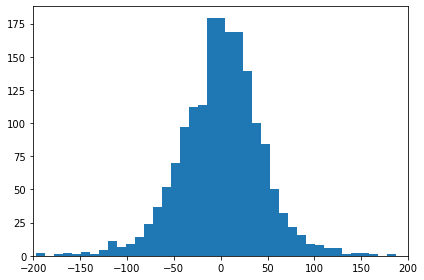

In [132]:
residuals = test_y - predicted_y_test
plt.hist(residuals, bins = 50)
plt.xlim([-200,200])
plt.tight_layout()
plt.show()

In [133]:
model_accuracies['Random forest'] = r2
model_rmse['Random forest'] = math.sqrt(mean_squared_error(test_y_prediction, y_pred_rf))

# 4. Support Vector Regression

In [134]:
# Import libraries
import pandas as pd
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [135]:
# Load your dataset and split it into training and testing sets
X_prediction = predictors_df1
y_prediction = response_df
train_X_prediction, test_X_prediction, train_y_prediction, test_y_prediction = train_test_split(X_prediction, 
                                                            y_prediction, test_size=0.3, random_state=42)

In [136]:
# Train the model
model = SVR(kernel='linear')
model.fit(train_X_prediction, train_y_prediction)

SVR(kernel='linear')

In [137]:
# Make predictions
y_pred_svr = model.predict(test_X_prediction)

In [138]:
# Evaluate the model
mse = mean_squared_error(test_y_prediction, y_pred_svr)
print("Mean Squared Error:", mse)

Mean Squared Error: 2330.163732849866


In [139]:
print("Root Mean Squared Error (RMSE): ", round(math.sqrt(mse), 4))

Root Mean Squared Error (RMSE):  48.2718


In [140]:
predicted_y_training_corollas = model.predict(train_X_prediction)

In [141]:
print("Root Mean Squared Error (RMSE): ", round(mean_squared_error(train_y_prediction, predicted_y_training_corollas) ** 0.5, 4))

Root Mean Squared Error (RMSE):  46.345


In [142]:
# Check R^2 of our test data
model.score(test_X_prediction,test_y_prediction)

0.7771814699541739

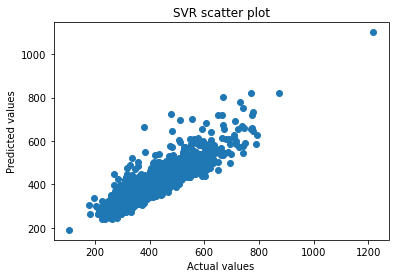

In [143]:
import matplotlib.pyplot as plt

plt.scatter(test_y_prediction, y_pred_svr)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('SVR scatter plot')
plt.show()


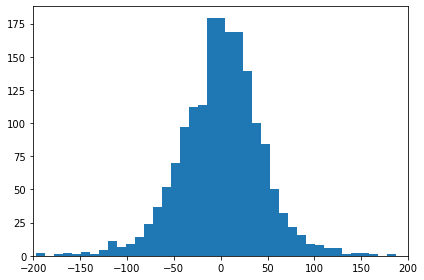

In [144]:
residuals = test_y - predicted_y_test
plt.hist(residuals, bins = 50)
plt.xlim([-200,200])
plt.tight_layout()
plt.show()

In [145]:
model_accuracies['Support vector Regressor'] = model.score(test_X_prediction,test_y_prediction)
model_rmse['Support vector Regressor'] = math.sqrt(mean_squared_error(test_y_prediction, y_pred_svr))

# 5. KNN

In [146]:
# Import libraries
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [147]:
# Load your dataset and split it into training and testing sets
X_prediction = predictors_df1
y_prediction = response_df
train_X_prediction, test_X_prediction, train_y_prediction, test_y_prediction = train_test_split(X_prediction, 
                                                            y_prediction, test_size=0.3, random_state=42)

In [148]:
# Train the model
model = KNeighborsRegressor(n_neighbors=10)
model.fit(train_X_prediction, train_y_prediction)

KNeighborsRegressor(n_neighbors=10)

In [149]:
# Make predictions
y_pred_knn = model.predict(test_X_prediction)

In [150]:
# Evaluate the model
mse = mean_squared_error(test_y_prediction, y_pred_knn)
print("Mean Squared Error:", mse)

Mean Squared Error: 2910.1778176688435


In [151]:
print("Root Mean Squared Error (RMSE): ", round(math.sqrt(mse), 4))

Root Mean Squared Error (RMSE):  53.9461


In [152]:
predicted_y_training_corollas = model.predict(train_X_prediction)

In [153]:
print("Root Mean Squared Error (RMSE): ", round(mean_squared_error(train_y_prediction, predicted_y_training_corollas) ** 0.5, 4))

Root Mean Squared Error (RMSE):  45.9932


In [154]:
# Check R^2 of our test data
model.score(test_X_prediction,test_y_prediction)

0.7217184636583985

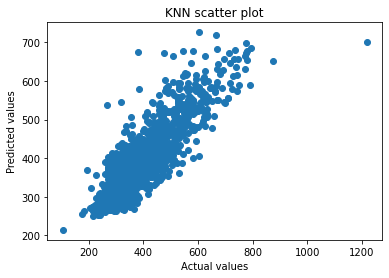

In [155]:
import matplotlib.pyplot as plt

plt.scatter(test_y_prediction, y_pred_knn)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('KNN scatter plot')
plt.show()


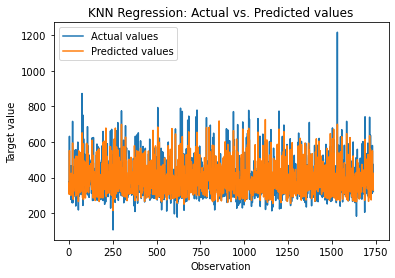

In [156]:
import matplotlib.pyplot as plt

plt.plot(test_y_prediction.values.ravel(), label='Actual values')
plt.plot(y_pred_knn.ravel(), label='Predicted values')
plt.title('KNN Regression: Actual vs. Predicted values')
plt.xlabel('Observation')
plt.ylabel('Target value')
plt.legend()
plt.show()

In [157]:
model_accuracies['KNN'] = model.score(test_X_prediction,test_y_prediction)
model_rmse['KNN'] = math.sqrt(mean_squared_error(test_y_prediction, y_pred_knn))

# 6. Gradient boosting regression

In [158]:
from sklearn.ensemble import GradientBoostingRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [159]:
# Dividing the data
X = predictor_df_normalized
y = response_df
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=1)

In [160]:
GB = GradientBoostingRegressor(random_state=616).fit(train_X, train_y)
predicted_y_training = GB.predict(train_X)

In [161]:
predicted_y_test = GB.predict(test_X)

In [162]:
print("Root Mean Squared Error (RMSE): ", round(mean_squared_error(train_y, predicted_y_training) ** 0.5, 4))

Root Mean Squared Error (RMSE):  35.9822


In [163]:
print("Root Mean Squared Error (RMSE): ", round(mean_squared_error(test_y, predicted_y_test) ** 0.5, 4))

Root Mean Squared Error (RMSE):  40.607


In [164]:
r2 = r2_score(test_y, predicted_y_test)
r2

0.8317678207798673

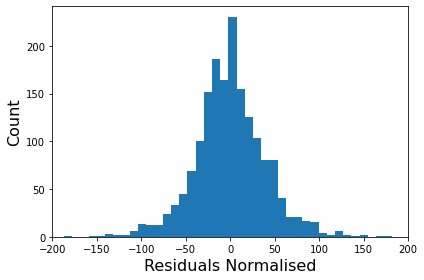

In [165]:
# # Checking if our residuals are normally distributed
residuals = test_y - predicted_y_test
plt.hist(residuals, bins = 50)
plt.xlim([-200,200])
plt.xlabel('Residuals Normalised',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.tight_layout()

In [166]:
feature_imp_GB = pd.Series(GB.feature_importances_, index = predictors_df1.columns)
feature_imp_GB

LOT_SQFT          0.104937
YR_BUILT          0.021359
LIVING_AREA       0.764878
FLOORS            0.036418
ROOMS             0.004134
BEDROOMS          0.001021
FULL_BATH         0.018908
HALF_BATH         0.015056
KITCHEN           0.000109
FIREPLACE         0.022143
REMODEL_Old       0.000346
REMODEL_Recent    0.010692
dtype: float64

Text(0.5, 1.0, 'Gradient Boost model')

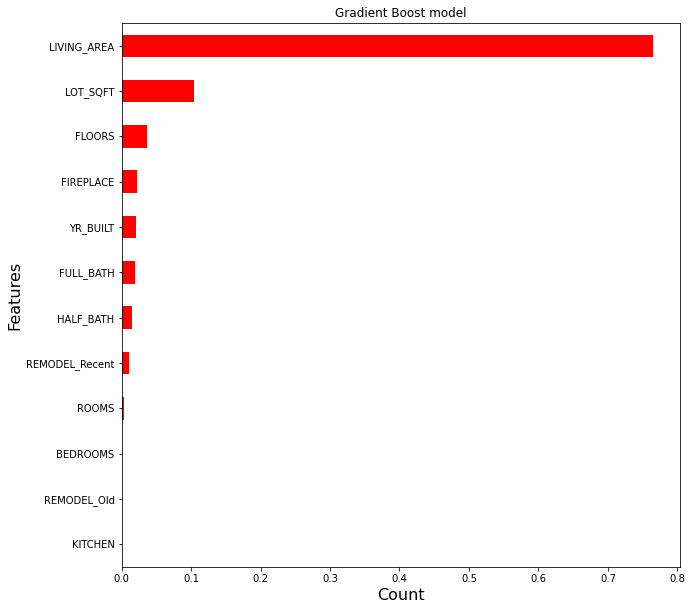

In [167]:
# Checking for feature importance with Gradient boost model
figure(figsize=(10,10))
feature_imp_GB.sort_values().plot.barh(color='red')
plt.xlabel('Count',fontsize=16)
plt.ylabel('Features',fontsize=16)
plt.title('Gradient Boost model')

In [168]:
model_accuracies['Gradient Boosting'] = r2
model_rmse['Gradient Boosting'] = math.sqrt(mean_squared_error(test_y, predicted_y_test))

# 7. Lasso regression

In [169]:
from sklearn.linear_model import Lasso
import seaborn as sns

In [170]:
# Model to use
lasso = Lasso(alpha=0.1)

In [171]:
lasso.fit(train_X, train_y)

Lasso(alpha=0.1)

In [172]:
predicted_y_training = lasso.predict(train_X)

In [173]:
print("Root Mean Squared Error (RMSE): ", round(mean_squared_error(train_y, predicted_y_training) ** 0.5, 4))

Root Mean Squared Error (RMSE):  44.1868


In [174]:
predicted_y_test = lasso.predict(test_X)

In [175]:
print("Root Mean Squared Error (RMSE): ", round(mean_squared_error(test_y, predicted_y_test) ** 0.5, 4))

Root Mean Squared Error (RMSE):  44.2358


In [176]:
# Checking for accuracy
r2 = r2_score(test_y, predicted_y_test)
r2

0.8003560717136704

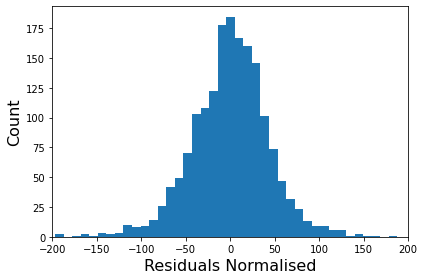

In [177]:
# # Checking if our residuals are normally distributed
residuals = test_y - predicted_y_test
plt.hist(residuals, bins = 50)
plt.xlim([-200,200])
plt.xlabel('Residuals Normalised',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.tight_layout()

In [178]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [179]:
import yellowbrick
from yellowbrick.regressor import ResidualsPlot

C:\Users\pavan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


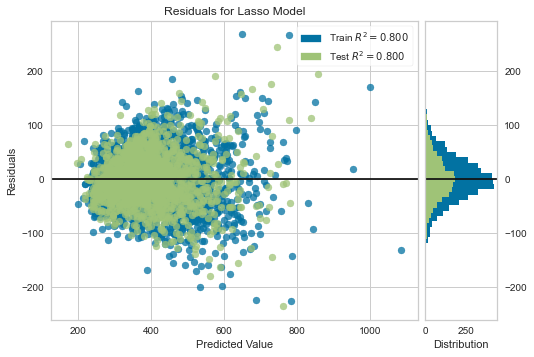

<AxesSubplot:title={'center':'Residuals for Lasso Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [180]:
# Plot for residuals in Lasso model
visualizer = ResidualsPlot(lasso)
visualizer.fit(train_X, train_y)  
visualizer.score(test_X, test_y)  
visualizer.poof()

In [181]:
model_accuracies['Lasso Regression'] = r2
model_rmse['Lasso Regression'] = math.sqrt(mean_squared_error(test_y, predicted_y_test))

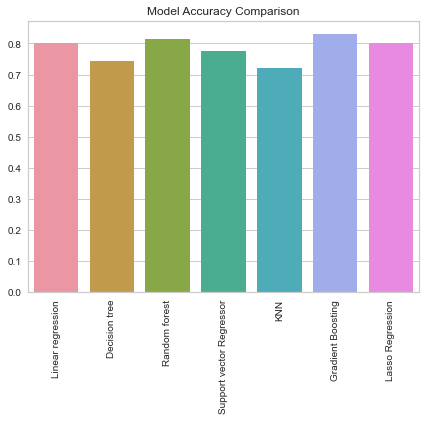

In [182]:
plt.subplots(figsize=(7,5))
sns.barplot(x= list(model_accuracies.keys()), y = [float(model_accuracies[k]) for k in list(model_accuracies.keys())])
plt.xticks(rotation=90)
plt.title('Model Accuracy Comparison')
plt.show()

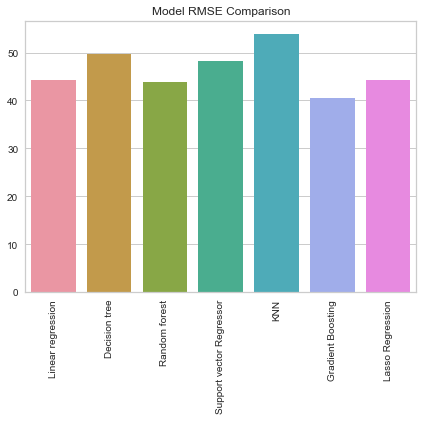

In [183]:
plt.subplots(figsize=(7,5))
sns.barplot(x= list(model_rmse.keys()), y = [float(model_rmse[k]) for k in list(model_rmse.keys())])
plt.xticks(rotation=90)
plt.title('Model RMSE Comparison')
plt.show()